In [33]:
import pandas as pd
import seaborn

data = pd.read_csv("nyt1.csv")

def age_group(age):
    if age == 18:
        return "18"
    elif 18 < age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"

In [65]:
data['age_group'] = data['Age'].map(lambda age: age_group(age))
data_grouped_by_age = data.groupby(by=["age_group"], as_index=False).sum()
data_grouped_by_age

,age_group,Age,Gender,Impressions,Clicks,Signed_In
0,18,97632,2892,27001,458,5424
1,18-24,750159,18829,176584,1709,35270
2,25-34,1716328,30958,290511,2937,58174
3,35-44,2798593,37676,355824,3662,70860
4,45-54,3181779,34007,322109,3232,64288
5,55-64,2661830,23988,224688,4556,44738
6,65+,2098644,10445,144120,4350,28753


<AxesSubplot:xlabel='age_group', ylabel='Impressions'>

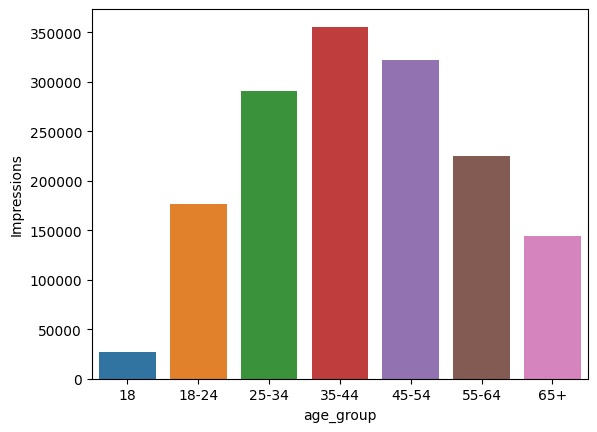

In [71]:
seaborn.barplot(data=data_grouped_by_age, x="age_group", y="Clicks")

<AxesSubplot:xlabel='age_group', ylabel='Impressions'>

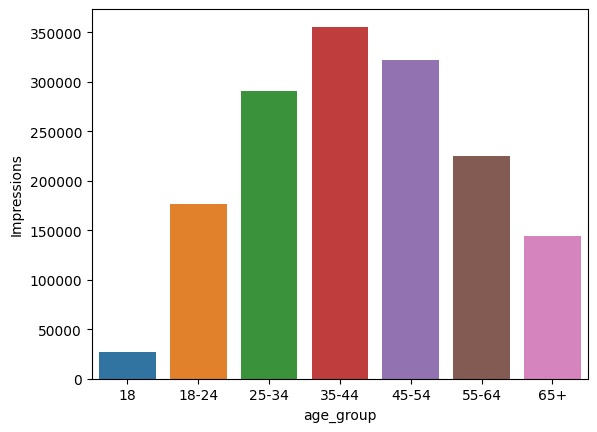

In [72]:
seaborn.barplot(data=data_grouped_by_age, x="age_group", y="Impressions")

   Gender  Signed_In   Count
0  Female     153070  290176
1    Male     168265  168265


/var/folders/jy/h3839gc51t5fzwf7gq70nxgw0000gn/T/ipykernel_2503/1957991174.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_gender = data.groupby(by=["Gender"], as_index=False).sum()


<AxesSubplot:xlabel='Gender', ylabel='Users'>

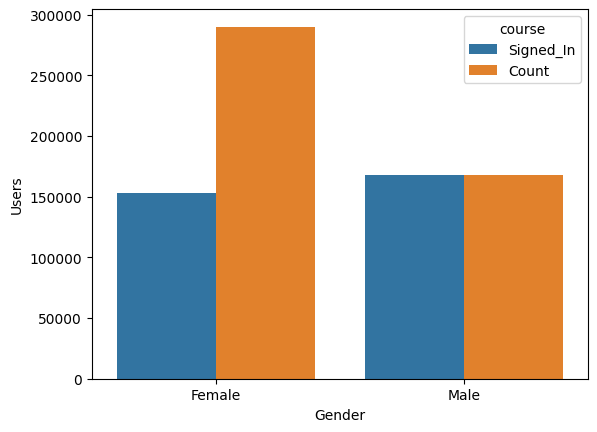

In [86]:
# man vs women signed in
data_grouped_by_gender = data.groupby(by=["Gender"], as_index=False).sum()
data_grouped_by_gender['Count'] =[data['Gender'].value_counts()[0], data['Gender'].value_counts()[1]]
data_grouped_by_gender = data_grouped_by_gender.drop(["Age","Impressions","Clicks"], axis=1)

data_grouped_by_gender['Gender'] = data_grouped_by_gender['Gender'].map(lambda Gender: 'Male' if Gender == 1 else 'Female')

print(data_grouped_by_gender)
seaborn.barplot(data=data_grouped_by_gender.melt(id_vars='Gender',
                                  value_name='Users', var_name='course'),
            x='Gender', y='Users', hue='course')

In [106]:
data_summed = data_grouped_by_age
data_summed = data_summed.drop(["Age","Impressions","Clicks", 'Signed_In', 'Gender'], axis=1)
data_summed['CTR'] = data_grouped_by_age.apply(lambda row: row['Clicks'] / row['Impressions'] * 100, axis=1)
data_summed['Users'] = data.groupby(["age_group"], as_index=False).size()['size']

average_stats = data.groupby(["age_group"], as_index=False).mean()
data_summed['Avg Impression'] = average_stats['Impressions']
data_summed['Avg Clicks'] = average_stats['Clicks']
data_summed

,age_group,CTR,Users,Avg Impression,Avg Clicks
0,18,1.696233,5424,4.978060,0.084440
1,18-24,0.967811,35270,5.006635,0.048455
2,25-34,1.010977,58174,4.993829,0.050486
3,35-44,1.029160,70860,5.021507,0.051679
4,45-54,1.003387,64288,5.010406,0.050274
5,55-64,2.027701,44738,5.022308,0.101837
6,65+,3.018318,28753,5.012347,0.151289
